# Часть 1. Проверка гипотезы в Python и составление аналитической записки




- Автор: Васильева Ирина
- Дата: 21.08.2025

## Цели и задачи проекта

<font color='#777778'>Анализ сервиса ЯндексКниги. В данном проекте проверяется гипотеза, что пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы.</font>

## Описание данных

<font color='#777778'>Данные предоставлены сервисом ЯндексКниги. Для проекта используются данные пользователей из Москвы и Санкт-Петербурга.</font>

## Содержимое проекта

<font color='#777778'>Знакомство с данными.
Проверка на полные дубликаты.
Проверка гипотезы с помощью t-теста.
</font>

### Загрузка данных и знакомство с ними


In [13]:
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

In [2]:
data = pd.read_csv("/datasets/yandex_knigi_data.csv")

display(data.head(5))

data.info()

,Unnamed: 0,city,puid,hours
0,0,Москва,9668,26.167776
1,1,Москва,16598,82.111217
2,2,Москва,80401,4.656906
3,3,Москва,140205,1.840556
4,4,Москва,248755,151.326434


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8784 non-null   int64  
 1   city        8784 non-null   object 
 2   puid        8784 non-null   int64  
 3   hours       8784 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 274.6+ KB


Выведена информация о данных. Пропусков нет. Типы данных соответствуют содержимому колонок.

In [4]:
duplicates_count = data.duplicated().sum()
print(f"Количество полных дубликатов: {duplicates_count}")

if duplicates_count > 0:
    display(data[data.duplicated()])
puid_counts = data['puid'].value_counts()

duplicate_puids = puid_counts[puid_counts > 1]

print(f"Количество неявных дубликатов по puid: {len(duplicate_puids)}")

if not duplicate_puids.empty:
    display(data[data['puid'].isin(duplicate_puids.index)].sort_values(by='puid'))
  
data = data.drop_duplicates(subset='puid', keep='first')

print(f"Количество уникальных puid после очистки: {data['puid'].nunique()}")

Количество полных дубликатов: 0
Количество неявных дубликатов по puid: 244


,Unnamed: 0,city,puid,hours
35,35,Москва,2637041,10.317371
6247,6247,Санкт-Петербург,2637041,3.883926
134,134,Москва,9979490,32.415573
6274,6274,Санкт-Петербург,9979490,1.302997
145,145,Москва,10597984,42.931506
...,...,...,...,...
6195,6195,Москва,1130000020425037,0.310556
8775,8775,Санкт-Петербург,1130000023864516,14.384722
6202,6202,Москва,1130000023864516,142.830085
6210,6210,Москва,1130000028554332,11.277554


Количество уникальных puid после очистки: 8540


!!!Удалено 244 неявных дубликата

### 2. Проверка гипотезы в Python

Гипотеза звучит так: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуем статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

- Нулевая гипотеза H₀: Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.

- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

Проверка нормальности (normaltest):
Москва: p-value = 0.0000
СПб: p-value = 0.0000


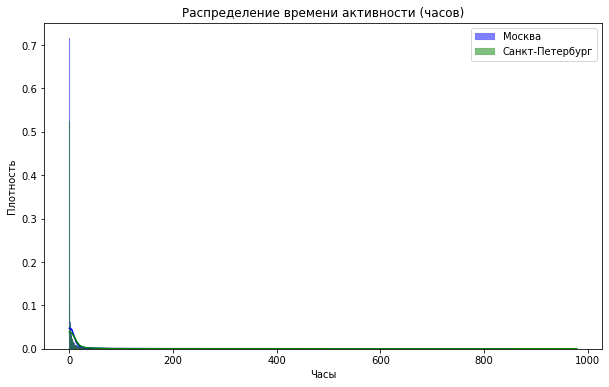


Односторонний t-тест:
t-статистика = 0.7782, p-value = 0.2182

Mann–Whitney U-тест:
U-статистика = 8093616.0000, p-value = 0.0891


In [31]:
moscow_hours = data[data['city'] == 'Москва']['hours']
spb_hours = data[data['city'] == 'Санкт-Петербург']['hours']

print('Проверка нормальности (normaltest):')
stat_msk, p_msk = normaltest(moscow_hours)
stat_spb, p_spb = normaltest(spb_hours)
print(f'Москва: p-value = {p_msk:.4f}')
print(f'СПб: p-value = {p_spb:.4f}')
plt.figure(figsize=(10, 6))
sns.histplot(moscow_hours, kde=True, color='blue', label='Москва', stat='density')
sns.histplot(spb_hours, kde=True, color='green', label='Санкт-Петербург', stat='density')
plt.title('Распределение времени активности (часов)')
plt.xlabel('Часы')
plt.ylabel('Плотность')
plt.legend()
plt.show()

t_stat, p_value_ttest = ttest_ind(spb_hours, moscow_hours, equal_var=False, alternative='greater')
print(f"\nОдносторонний t-тест:")
print(f"t-статистика = {t_stat:.4f}, p-value = {p_value_ttest:.4f}")

u_stat, p_value_mw = mannwhitneyu(spb_hours, moscow_hours, alternative='greater')
print(f"\nMann–Whitney U-тест:")
print(f"U-статистика = {u_stat:.4f}, p-value = {p_value_mw:.4f}")

Проверка нормальности на тесте для больших выборок - нормальность не подтверждена.
Применен Mann–Whitney U-тест. p-value = 0.0891. 

### 3. Аналитическая записка
По результатам анализа данных подготовим аналитическую записку, в которой опишете:

- Выбранный тип t-теста и уровень статистической значимости.

- Результат теста, или p-value.

- Вывод на основе полученного p-value, то есть интерпретацию результатов.

- Одну или две возможные причины, объясняющие полученные результаты.



Данные взяты из таблицы yandex_knigi_data.csv.
Сравнивались две независимые выборки: Москва и Санкт-Петербург.
Применен Mann–Whitney U-тест.
Уровень статистической значимости: α = 0.05.
Результаты теста:
U-статистика = 8093616.0000, p-value = 0.0891
Интерпретация:
Так как p-value (0.0891) близок к  пороговому значению α = 0.05, это может говорить о тенденции к большей активности пользователей из СПБ, но статистически значимого подтверждения нет.
Вывод:
Мы не можем утверждать, что пользователи Санкт-Петербурга проводят статистически значимо больше времени в приложении, чем пользователи Москвы. Различия между выборками не являются значимыми. Нулевую гипотезу нельзя отвергнуть.
Возможные причины результатов:
1.Москва и Санкт-Петербург - города-миллионники с близким образом жизни и уровнем цифровой грамотности. Пользователи в этих городах могут иметь схожие привычки чтения и прослушивания книг, что нивелирует различия.
2.Недостаточный объём или разброс данных.
Возможно, размер выборки или вариация внутри групп слишком велики. Разброс значений «часов активности» внутри каждой группы может «размывать» средние значения и мешать выявить статистически значимое различие.

# Часть 2. Анализ результатов A/B-тестирования

Теперь нужно проанализировать другие данные. К вам обратились представители интернет-магазина BitMotion Kit, в котором продаются геймифицированные товары для тех, кто ведёт здоровый образ жизни. У него есть своя целевая аудитория, даже появились хиты продаж: эспандер со счётчиком и напоминанием, так и подстольный велотренажёр с Bluetooth.

В будущем компания хочет расширить ассортимент товаров. Но перед этим нужно решить одну проблему. Интерфейс онлайн-магазина слишком сложен для пользователей — об этом говорят отзывы.

Чтобы привлечь новых клиентов и увеличить число продаж, владельцы магазина разработали новую версию сайта и протестировали его на части пользователей. По задумке, это решение доказуемо повысит количество пользователей, которые совершат покупку.

Задача — провести оценку результатов A/B-теста. В вашем распоряжении:

* данные о действиях пользователей и распределении их на группы,

* техническое задание.

Оценим корректность проведения теста и проанализируйте его результаты.

### 1. Опишите цели исследования.



Проводится А\В тестирование по новой версии сайта. Предполагается, что эта версия доказуемо повысит количество пользователей, которые совершат покупку.

### 2. Загрузите данные, оцените их целостность.


In [18]:
participants = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_participants.csv')
events = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_events.zip',
                     parse_dates=['event_dt'], low_memory=False)
display(participants.head(5))
display(events.head(5))
participants.info()
events.info()

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
1,001064FEAAB631A1,B,recommender_system_test,Android
2,001064FEAAB631A1,A,interface_eu_test,Android
3,0010A1C096941592,A,recommender_system_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac


,user_id,event_dt,event_name,details
0,GLOBAL,2020-12-01 00:00:00,End of Black Friday Ads Campaign,ZONE_CODE15
1,CCBE9E7E99F94A08,2020-12-01 00:00:11,registration,0.0
2,GLOBAL,2020-12-01 00:00:25,product_page,NaN
3,CCBE9E7E99F94A08,2020-12-01 00:00:33,login,NaN
4,CCBE9E7E99F94A08,2020-12-01 00:00:52,product_page,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
 3   device   14525 non-null  object
dtypes: object(4)
memory usage: 454.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787286 entries, 0 to 787285
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     787286 non-null  object        
 1   event_dt    787286 non-null  datetime64[ns]
 2   event_name  787286 non-null  object        
 3   details     249022 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 24.0+ MB


## 3. По таблице `ab_test_participants` оцените корректность проведения теста:

   3\.1 Выделим пользователей, участвующих в тесте, и проверьте:

   - соответствие требованиям технического задания,

   - равномерность распределения пользователей по группам теста,

   - отсутствие пересечений с конкурирующим тестом (нет пользователей, участвующих одновременно в двух тестовых группах).

In [22]:
iface = participants.query("ab_test == 'interface_eu_test'").copy()

print(f"Всего записей в interface_eu_test: {len(iface)}")
print(f"Уникальных пользователей в interface_eu_test: {iface['user_id'].nunique()}")

print("\nСписок групп в interface_eu_test:")
print(iface['group'].value_counts(dropna=False))

grp_per_user = (iface.groupby('user_id')['group']
                     .nunique()
                     .rename('unique_groups'))
multi_group_users = grp_per_user[grp_per_user > 1]

print(f"\nПользователей, попавших одновременно в две группы A и B (нарушение рандомизации): {multi_group_users.shape[0]}")
if not multi_group_users.empty:
    print("Примеры user_id с дублированием групп:")
    print(multi_group_users.head())

dup_count = iface.duplicated().sum()
print(f"\nПолных дубликатов строк в interface_eu_test: {dup_count}")

users_per_group = (iface.drop_duplicates(['user_id', 'ab_test'])
                         .groupby('group')['user_id']
                         .nunique()
                         .rename('users')
                         .reset_index())
total_users_iface = users_per_group['users'].sum()
users_per_group['share_%'] = (users_per_group['users'] / total_users_iface * 100).round(2)

print("\nРаспределение пользователей по группам (уникальные пользователи):")
print(users_per_group)
if {'A','B'}.issubset(set(users_per_group['group'])):
    a = int(users_per_group.loc[users_per_group['group']=='A', 'users'])
    b = int(users_per_group.loc[users_per_group['group']=='B', 'users'])
    imbalance_pct = 100 * abs(a - b) / total_users_iface
    print(f"\nАбсолютная разница долей между A и B: {imbalance_pct:.2f}%")
else:
    print("\nВнимание: найдены не только группы A/B — проверьте исходные данные.")

reco = participants.query("ab_test == 'recommender_system_test'").copy()
iface_users = set(iface['user_id'])
reco_users = set(reco['user_id'])
overlap_users = iface_users & reco_users

print(f"\nПересечений пользователей между interface_eu_test и recommender_system_test: {len(overlap_users)}")

if overlap_users:
    overlap_df = participants[participants['user_id'].isin(overlap_users)][['user_id','ab_test','group','device']]

    print("\nПримеры пересечений (первые 10 строк):")
    print(overlap_df.head(10))

    cross_check = (overlap_df.groupby(['ab_test','user_id'])['group']
                             .nunique()
                             .reset_index(name='unique_groups'))
    bad_cross = cross_check[cross_check['unique_groups'] > 1]
    print(f"\nСлучаев, когда один пользователь имеет >1 группы внутри одного теста среди пересечений: {bad_cross.shape[0]}")



Всего записей в interface_eu_test: 10850
Уникальных пользователей в interface_eu_test: 10850

Список групп в interface_eu_test:
B    5467
A    5383
Name: group, dtype: int64

Пользователей, попавших одновременно в две группы A и B (нарушение рандомизации): 0

Полных дубликатов строк в interface_eu_test: 0

Распределение пользователей по группам (уникальные пользователи):
  group  users  share_%
0     A   5383    49.61
1     B   5467    50.39

Абсолютная разница долей между A и B: 0.77%

Пересечений пользователей между interface_eu_test и recommender_system_test: 887

Примеры пересечений (первые 10 строк):
             user_id                  ab_test group   device
1   001064FEAAB631A1  recommender_system_test     B  Android
2   001064FEAAB631A1        interface_eu_test     A  Android
9   00341D8401F0F665  recommender_system_test     A   iPhone
10  00341D8401F0F665        interface_eu_test     B   iPhone
25  0082295A41A867B5        interface_eu_test     A   iPhone
26  0082295A41A867B5 

3\.2 Проанализируем данные о пользовательской активности по таблице `ab_test_events`:

- оставьте только события, связанные с участвующими в изучаемом тесте пользователями;

In [23]:
iface_users = iface[['user_id']].drop_duplicates()

events_iface = events.merge(iface_users, on='user_id', how='inner')

print(f"Всего событий для участников interface_eu_test: {len(events_iface)}")
display(events_iface.head())


Всего событий для участников interface_eu_test: 79715


,user_id,event_dt,event_name,details
0,5F506CEBEDC05D30,2020-12-06 14:10:01,registration,0.0
1,5F506CEBEDC05D30,2020-12-07 01:25:14,login,NaN
2,5F506CEBEDC05D30,2020-12-07 01:25:47,login,NaN
3,5F506CEBEDC05D30,2020-12-09 12:40:49,login,NaN
4,5F506CEBEDC05D30,2020-12-09 12:40:49,product_page,NaN


- определим горизонт анализа: рассчитайте время (лайфтайм) совершения события пользователем после регистрации и оставьте только те события, которые были выполнены в течение первых семи дней с момента регистрации;

In [24]:

registration = events_iface[events_iface['event_name'] == 'registration'][['user_id', 'event_dt']]
registration = registration.rename(columns={'event_dt':'reg_dt'})

events_with_reg = events_iface.merge(registration, on='user_id', how='left')

events_with_reg['days_since_registration'] = (events_with_reg['event_dt'] - events_with_reg['reg_dt']).dt.days

events_7days = events_with_reg[events_with_reg['days_since_registration'].between(0, 7)].copy()

print(f"Количество событий в первые 7 дней после регистрации: {len(events_7days)}")
display(events_7days.head())


Количество событий в первые 7 дней после регистрации: 71060


,user_id,event_dt,event_name,details,reg_dt,days_since_registration
0,5F506CEBEDC05D30,2020-12-06 14:10:01,registration,0.0,2020-12-06 14:10:01,0
1,5F506CEBEDC05D30,2020-12-07 01:25:14,login,NaN,2020-12-06 14:10:01,0
2,5F506CEBEDC05D30,2020-12-07 01:25:47,login,NaN,2020-12-06 14:10:01,0
3,5F506CEBEDC05D30,2020-12-09 12:40:49,login,NaN,2020-12-06 14:10:01,2
4,5F506CEBEDC05D30,2020-12-09 12:40:49,product_page,NaN,2020-12-06 14:10:01,2


Оценим достаточность выборки для получения статистически значимых результатов A/B-теста. Заданные параметры:

- базовый показатель конверсии — 30%,

- мощность теста — 80%,

- достоверность теста — 95%.

In [25]:
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

alpha = 0.05       
power = 0.8         
p = 0.3             
mde = 0.03          

effect_size = proportion_effectsize(p, p + mde)


analysis = NormalIndPower()

sample_size_per_group = analysis.solve_power(
    effect_size=effect_size,
    alpha=alpha,
    power=power,
    ratio=1 
)

print(f"Необходимый размер выборки на каждую группу: {int(sample_size_per_group)}")


unique_users = events_7days['user_id'].nunique()
print(f"Всего уникальных пользователей в выборке: {unique_users}")

Необходимый размер выборки на каждую группу: 3761
Всего уникальных пользователей в выборке: 10850


Размер выборки достаточный.

- рассчитаем для каждой группы количество посетителей, сделавших покупку, и общее количество посетителей.

In [26]:
events_with_group = events_7days.merge(
    participants.query("ab_test == 'interface_eu_test'")[['user_id', 'group']],
    on='user_id',
    how='left'
)

total_users_per_group = events_with_group.groupby('group')['user_id'].nunique().reset_index(name='total_users')

purchase_per_user = events_with_group[events_with_group['event_name'] == 'purchase'] \
    .groupby('group')['user_id'].nunique() \
    .reset_index(name='purchasers')

summary = total_users_per_group.merge(purchase_per_user, on='group', how='left')
summary['purchasers'] = summary['purchasers'].fillna(0).astype(int)

summary['conversion'] = summary['purchasers'] / summary['total_users'] * 100

display(summary)


,group,total_users,purchasers,conversion
0,A,5383,1542,28.645737
1,B,5467,1687,30.857875


В контрольной группе A из 5383 пользователей 1542 совершили покупку - конверсия ≈ 28.6%.
В тестовой группе B из 5467 пользователей 1687 совершили покупку - конверсия ≈ 30.9%.
То есть в тестовой группе B наблюдается рост активности пользователей: на 2,3 % выше доля пользователей, совершивших покупку.
Предварительный вывод: новая версия сайта демонстрирует положительное влияние на конверсию, пользователи более активно совершают покупки.

### 4. Проведем оценку результатов A/B-тестирования:

- Проверим изменение конверсии подходящим статистическим тестом, учитывая все этапы проверки гипотез.

Нулевая гипозтеза H₀ - новая версия сайта не повлияет на количество покупок
Альтернативная гипотеза H₁ - новая версия сайта статистически значимо повлияет на количество покупок 

In [29]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

summary_sorted = summary.sort_values(by='group', ascending=False).reset_index(drop=True)

purchasers = summary_sorted['purchasers'].values
total_users = summary_sorted['total_users'].values

stat, p_value_two_sided = proportions_ztest(count=purchasers, nobs=total_users)

conversion_b = purchasers[0] / total_users[0]
conversion_a = purchasers[1] / total_users[1]
p_value_one_sided = p_value_two_sided / 2 if conversion_b > conversion_a else 1 - p_value_two_sided / 2

print(f"Z-статистика: {stat:.4f}")
print(f"p-value (односторонний тест): {p_value_one_sided:.4f}")

alpha = 0.05
if p_value_one_sided < alpha:
    print("Различие статистически значимо: конверсия в группе B выше, чем в группе A.")
else:
    print("Различие не является статистически значимым.")

Z-статистика: 2.5198
p-value (односторонний тест): 0.0059
Различие статистически значимо: конверсия в группе B выше, чем в группе A.


На основании проведённого анализа A/B-теста можно сделать следующие выводы:
Повышение конверсии:
В тестовой группе B конверсия пользователей, совершивших покупку, составила 30,9%, тогда как в контрольной группе A - 28,6%. Это соответствует росту на 2,3%
Статистическая значимость:
Z-статистика = -2.5198, p-value = 0.0059 (односторонний тест). Так как p-value < 0.05, мы отвергаем нулевую гипотезу H₀. Это означает, что различие в конверсии статистически значимо, и повышение конверсии в группе B не случайно.
Интерпретация результата:
Новая версия сайта, которая тестировалась на группе B, действительно привела к увеличению активности пользователей, выразившейся в более высокой доле совершивших покупку.
Оценка достижения эффекта:
Ожидаемый эффект в увеличении конверсии достигнут: тест показал положительное влияние интерфейса на поведение пользователей. Следующим шагом можно рассмотреть внедрение изменений для всех пользователей и продолжить мониторинг ключевых метрик.
Итог: A/B-тест показал успешное улучшение пользовательской активности и конверсии, и результаты статистически подтверждены.